# Optics Tutorials

The following tutorials show the usage of various lens-related functions in the optics.py module, which implements a range of functions related to optical systems and the human eye. Many of these functions are used in MORTICIA.

In [1]:
# Perform the standard numpy and units imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import sys
import morticia.sensor.optics as optics
# This notebook is also used for development/testing of the Optics module, so auto reload the Optics module if it changes
%load_ext autoreload
%aimport morticia.sensor.optics
%autoreload 1

In [2]:
SpatialFrequencies = Q_(np.arange(0.0, 2200.0, 50.0), '1/millimeter') # cycles per millimeter
Wavelengths = Q_([0.001, 0.0005], 'millimeter') # Wavelengths expressed in mm as well to get valid MTF calculation
FocalRatios = Q_(1.0, '')
MTF = optics.mtf(spf=SpatialFrequencies, wvl=Wavelengths, fno=FocalRatios)

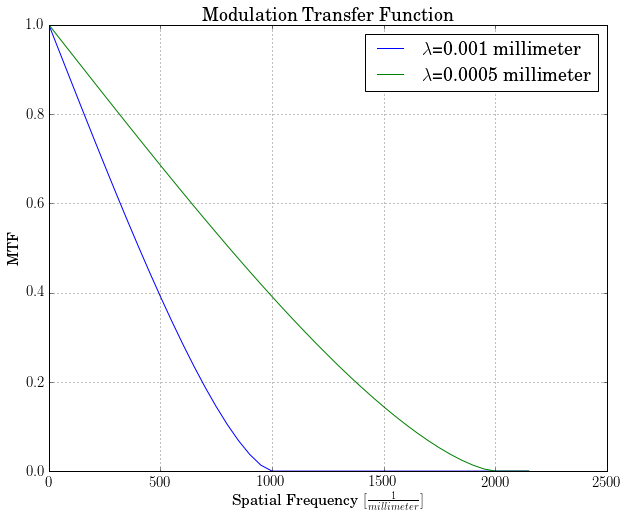

In [3]:
plt.figure(figsize=(10,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font 
plt.plot(SpatialFrequencies, MTF)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('MTF')
plt.title('Modulation Transfer Function')
plt.legend(['$\lambda$=' + str(wvl) for wvl in Wavelengths])
plt.grid()

In [4]:
# Calculate MTF of system with central obscuration
SpatialFrequencies = Q_(np.arange(0.0, 1010.0, 10.0), '1/millimeter') # cycles per millimeter
Wavelengths = Q_(0.001, 'millimeter') # Wavelengths expressed in mm as well to get valid MTF calculation
FocalRatios = [1.0, 2.0]
Obscuration = 0.4  # Aperture is circular with a centred circular obscuration of 40% of the diameter
MTF = optics.mtf(spf=SpatialFrequencies, wvl=Wavelengths, fno=FocalRatios)
MTF = optics.mtf_obs(spf=SpatialFrequencies, wvl=Wavelengths, fno=FocalRatios, obs=Obscuration)

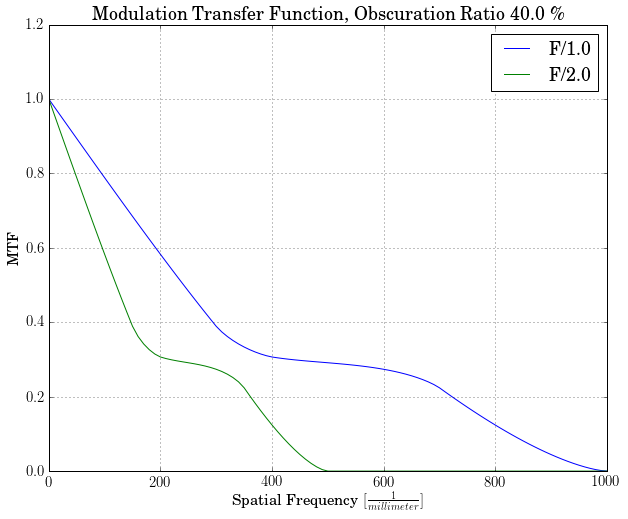

In [5]:
# Plot MTF of obscured system
plt.figure(figsize=(10,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font
plt.plot(SpatialFrequencies, MTF)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('MTF')
plt.title('Modulation Transfer Function, Obscuration Ratio ' + str(Obscuration*100) + ' \%')
plt.legend(['F/' + str(fno) for fno in FocalRatios])
plt.grid()

In [6]:
# Illustrate the effect of wavefront distortion on the MTF
SpatialFrequencies = Q_(np.arange(0.0, 1010.0, 10.0), '1/millimeter') # cycles per millimeter
Wavelengths = Q_(0.001, 'millimeter') # Wavelengths expressed in mm as well to get valid MTF calculation
FocalRatios = [1.0, 2.0]
RMSWavefrontError = 0.18
# Calculate the Aberration Transfer Function (ATF)
theATF = optics.atf(SpatialFrequencies, Wavelengths, FocalRatios, RMSWavefrontError)

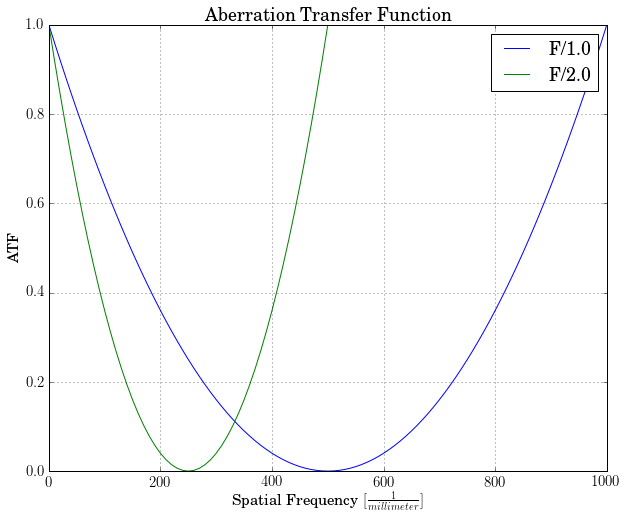

In [7]:
plt.figure(figsize=(10,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font
plt.plot(SpatialFrequencies, theATF)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('ATF')
plt.title('Aberration Transfer Function')
plt.legend(['F/' + str(fno) for fno in FocalRatios])
plt.grid()

In [8]:
# Now include aberration transfer function in an MTF calculation
SpatialFrequencies = Q_(np.arange(0.0, 400.0, 1.0), '1/millimeter') # cycles per millimeter
Wavelengths = Q_([0.001, 0.0012, 0.0013], 'millimeter') # Wavelengths expressed in mm as well to get valid MTF calculation
WavelengthWeights = np.array([0.4, 0.8, 1.5])
FocalRatios = [2.8, 4.0]
RMSWavefrontError = [0.05, 0.09, 0.12]
ObscurationRatio = 0.0
PolyMTFwithObscurationAndWFE = optics.pmtf_obs_wfe(SpatialFrequencies, Wavelengths, 
                                                   FocalRatios, RMSWavefrontError,
                                                   WavelengthWeights, ObscurationRatio)

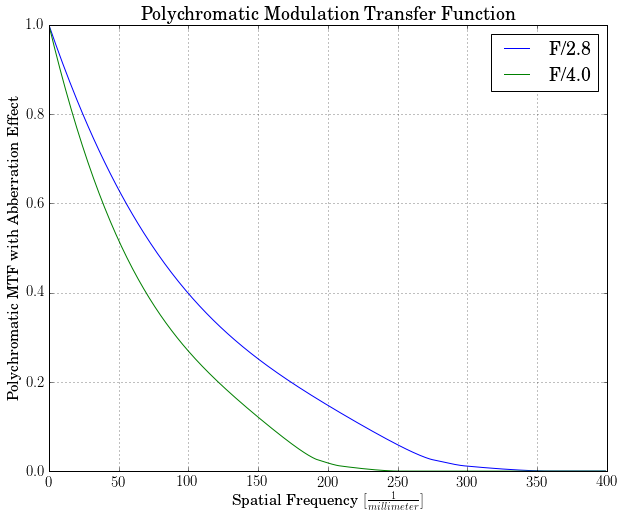

In [9]:
# Plot of MTF including aberrations
plt.figure(figsize=(10,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font
plt.plot(SpatialFrequencies, PolyMTFwithObscurationAndWFE)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('Polychromatic MTF with Abberration Effect')
plt.title('Polychromatic Modulation Transfer Function')
plt.legend(['F/' + str(fno) for fno in FocalRatios])
plt.grid()

In [10]:
# Illustrate calculation of polychromatic MTF
Wavelengths = Q_(np.array([350.0, 450.0, 550.0, 650.0])/1e6, 'millimeter')  # mm
WavelengthWeights = np.array([0.3, 0.5, 0.8, 0.2])  # Must be same number of weights as wavelengths
SpatialFrequencies = Q_(np.arange(0,2500,5), '1/millimeter')  # cycles/mm
FocalRatios = np.array([1.4,2.0,2.8])
PolyMTF = optics.pmtf(SpatialFrequencies, Wavelengths, FocalRatios, WavelengthWeights)

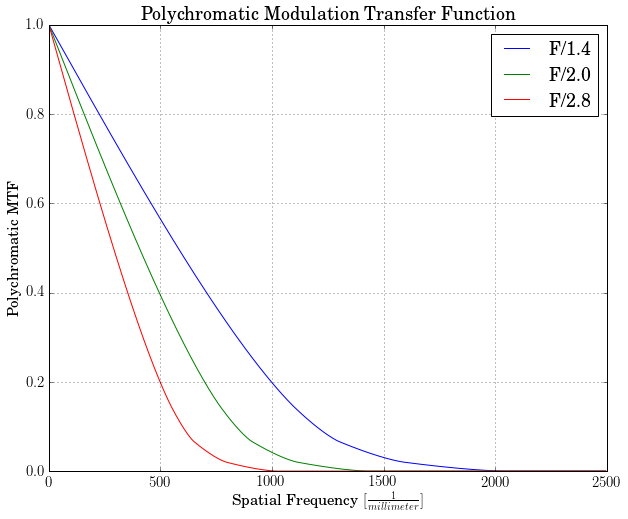

In [11]:
# Plot polychromatic MTF
plt.figure(figsize=(10,8))
plt.rc('text', usetex=True)  # Use TeX to render the labels in the plot
plt.rc('font', family='serif', size=15)  # Default to a serif font
plt.plot(SpatialFrequencies, PolyMTF)
plt.xlabel('Spatial Frequency $[{:~L}]$'.format(SpatialFrequencies.units))
plt.ylabel('Polychromatic MTF')
plt.title('Polychromatic Modulation Transfer Function')
plt.legend(['F/' + str(fno) for fno in FocalRatios])
plt.grid()